# Домашнее задание №3

In [44]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [5]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context

url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Всего в dataset 583 строки. 

Для столбцов Direct_Bilirubin и Total_Bilirubin заполнены все значения. Пропусков данных нет.
Так как одно значение из колонки Total_Bilirubin сильно отличается от остальных значений (75, следующее 42.8), удалим эту строку из набора данных.

In [30]:
data.sort_values(['Total_Bilirubin'], ascending=False).head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
166,55,Male,75.0,3.6,332,40,66,6.2,2.5,0.6,1
559,26,Male,42.8,19.7,390,75,138,7.5,2.6,0.5,1
505,32,Male,32.6,14.1,219,95,235,5.8,3.1,1.1,1


In [36]:
data_ = data.drop([166], axis=0)
data_.sort_values(['Total_Bilirubin'], ascending=False).head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
559,26,Male,42.8,19.7,390,75,138,7.5,2.6,0.5,1
505,32,Male,32.6,14.1,219,95,235,5.8,3.1,1.1,1
531,40,Male,30.8,18.3,285,110,186,7.9,2.7,0.5,1


In [37]:
Direct_Bilirubin = np.array(data_['Direct_Bilirubin']).reshape(-1,1)
Total_Bilirubin = np.array(data_['Total_Bilirubin']).reshape(-1,1)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()

# x = Direct_Bilirubin,
# y = Total_Bilirubin
X_train, X_test, y_train, y_test = train_test_split(
    Direct_Bilirubin,
    Total_Bilirubin,
    test_size = 0.2
)

In [38]:
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
model.score(X_test, y_test)

0.9815650046432863

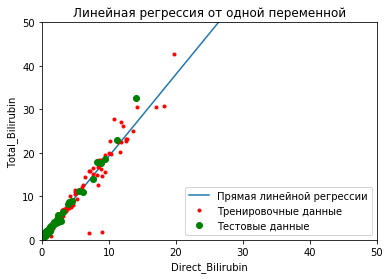

In [40]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(0, 100, 100)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(0,50)
plt.ylim(0,50)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

**Доверительные интервалы для Direct_Bilirubin и Total_Bilirubin**

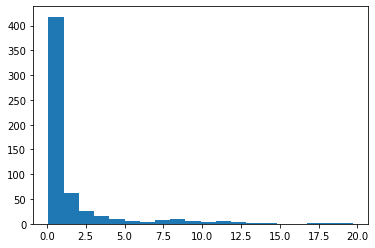

Среднее значение Direct_Bilirubin - 1.48
Стандартное отклонение Direct_Bilirubin - 2.81
93.47% выборки находится в пределах доверительного интервала.


In [55]:
# Расчеты для показателя Direct_Bilirubin

DB = data_['Direct_Bilirubin']

# Среднее значение
DB_mean = statistics.mean(DB)
# Стандартное отклонение
DB_deviation = statistics.pstdev(DB)
# Посчитаем процент элементов, лежащий за пределами доверительного интервала.
DB_perc = len(DB[(DB>=DB_mean-2*DB_deviation) & (DB<=DB_mean + 2*DB_deviation)])/len(DB)*100
# Частотный график выборки
plt.hist(DB, 20)
plt.show()

print(f'Среднее значение Direct_Bilirubin - {DB_mean:.2f}')
print(f'Стандартное отклонение Direct_Bilirubin - {DB_deviation:.2f}')
print(f'{DB_perc:.2f}% выборки находится в пределах доверительного интервала.')

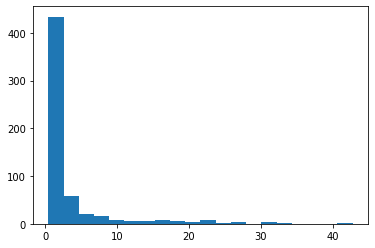

Среднее значение Total_Bilirubin - 3.18
Стандартное отклонение Total_Bilirubin - 5.45
93.47% выборки находится в пределах доверительного интервала.


In [56]:
# Расчеты для показателя Total_Bilirubin

TB = data_['Total_Bilirubin']

# Среднее значение
TB_mean = statistics.mean(TB)
# Стандартное отклонение
TB_deviation = statistics.pstdev(TB)
# Посчитаем процент элементов, лежащий за пределами доверительного интервала.
TB_perc = len(TB[(TB>=TB_mean-2*TB_deviation) & (TB<=TB_mean + 2*TB_deviation)])/len(TB)*100
# Частотный график выборки
plt.hist(TB, 20)
plt.show()

print(f'Среднее значение Total_Bilirubin - {TB_mean:.2f}')
print(f'Стандартное отклонение Total_Bilirubin - {TB_deviation:.2f}')
print(f'{TB_perc:.2f}% выборки находится в пределах доверительного интервала.')

Пример, как считать квантили:

In [61]:
Age = data_['Age']

print("Q2 квантиль ряда : ", np.quantile(Age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(Age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(Age, .75)) 
print("10 квантиль ряда : ", np.quantile(Age, .1)) 

Q2 квантиль ряда :  45.0
Q1 квантиль ряда :  33.0
Q3 квантиль ряда :  58.0
10 квантиль ряда :  23.0


Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [62]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


Пример квартилей:

In [63]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Посчитать квартили для всех колонок. 

Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

In [112]:
Dataset_less_50 = data[data['Age']<50]['Dataset']
Dataset_more_50 = data[data['Age']>=50]['Dataset']
print(len(Dataset_less_50), '- количество людей младше 50 лет в выборке')
print(len(Dataset_more_50), '- количество людей старше 50 лет в выборке')

# Среднее значение наличия болезни для людей младше 50
Dataset_less_50_mean = statistics.mean(Dataset_less_50)
print(f'Среднее значение наличия болезни для людей младше 50 - {Dataset_less_50_mean:.2f}')
# Среднее значение наличия болезни для людей старше 50
Dataset_more_50_mean = statistics.mean(Dataset_more_50)
print(f'Среднее значение наличия болезни для людей старше 50 - {Dataset_more_50_mean:.2f}')

print("Q2 квантиль ряда Dataset для людей младше 50 лет: ", np.quantile(Dataset_less_50, .50)) 
print("Q2 квантиль ряда Dataset для людей старше 50 лет: ", np.quantile(Dataset_more_50, .50)) 

353 - количество людей младше 50 лет в выборке
230 - количество людей старше 50 лет в выборке
Среднее значение наличия болезни для людей младше 50 - 1.32
Среднее значение наличия болезни для людей старше 50 - 1.24
Q2 квантиль ряда Dataset для людей младше 50 лет:  1.0
Q2 квантиль ряда Dataset для людей старше 50 лет:  1.0


График histogram по наличию и отсутствию болезни для людей младше 50 лет


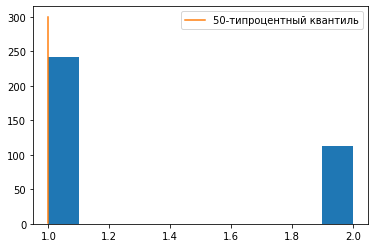

In [117]:
print('График histogram по наличию и отсутствию болезни для людей младше 50 лет') 
plt.hist(Dataset_less_50, 10)
plt.plot([1, 1],[1, 300])
plt.legend(['50-типроцентный квантиль'])
plt.show()

График histogram по наличию и отсутствию болезни для людей старше 50 лет


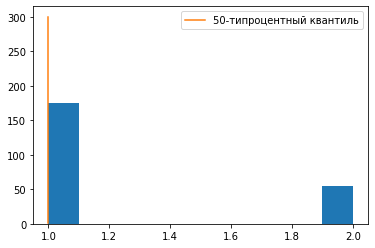

In [119]:
print('График histogram по наличию и отсутствию болезни для людей старше 50 лет') 
plt.hist(Dataset_more_50, 10)
plt.plot([1, 1],[1, 300])
plt.legend(['50-типроцентный квантиль'])
plt.show()

Так как в рядах данных есть только 2 значения: 1 или 2 (наличие и отсутствие болезни), и большее число пациентов страдает болезнью печени (значение 1), то среднее число в обоих выборках совпадает  и равно 1.

При этом среднее значение для группы младше 50 лет выше среднего значения группы старше 50 лет - 1,32 и 1,24 соответственно.
Что означает, что после 50 лет большее число людей страдает болезнью печени.


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?


Нулевая гипотеза - среднее значение выборки равно среднему значению генеральной совокупности.

In [128]:
# Уровень билирубина для всех пациентов
TB = data['Total_Bilirubin']

# Уровень билирубина только пациенты с болезнью печени
TB_Sick = data[data['Dataset'] == 1]['Total_Bilirubin']

print('Общее количество людей: ', len(TB))
print('Количество больных людей: ', len(TB_Sick))

stats.ttest_1samp(TB_Sick, TB.mean())

Общее количество людей:  583
Количество больных людей:  416


Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

T-значение = 2,47.
Что эта цифра означает я не понимаю и как с ней работать.

p-value = 0.014 или 1,4%, что меньше 5% доверительного интервала.

Среднее значение выборки очень близко среднему значению генеральной совокупности.

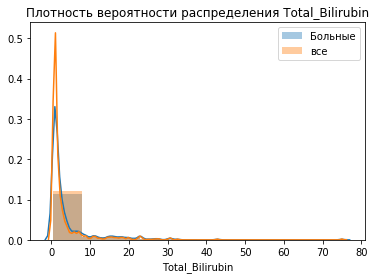

In [134]:
sns.distplot(TB_Sick, 10)
sns.distplot(TB, 10)
plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['Больные', 'все'])
plt.show()

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

Почему в задаче стоит, что выборка не похожа на генеральную совокупность?
Так как больные люди составляют большую часть от общего количества пациентов, то и среднее значение и графики будут близки.

Но мы могли бы сравнить данный показатель у больных и здоровых людей.

In [140]:
# Уровень билирубина для здоровых пациентов
TB_healthy = data[data['Dataset'] == 2]['Total_Bilirubin']

# Уровень билирубина только пациенты с болезнью печени
TB_Sick = data[data['Dataset'] == 1]['Total_Bilirubin']

print('Общее количество людей: ', len(TB_healthy))
print('Количество больных людей: ', len(TB_Sick))

stats.ttest_1samp(TB_Sick, TB_healthy.mean())

Общее количество людей:  167
Количество больных людей:  416


Ttest_1sampResult(statistic=8.62652639072032, pvalue=1.3571141537977623e-16)

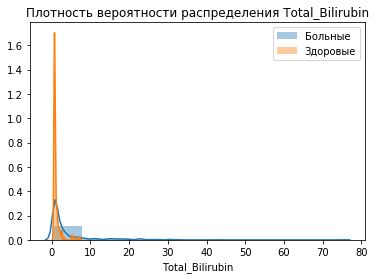

In [141]:
sns.distplot(TB_Sick, 10)
sns.distplot(TB_healthy, 10)
plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['Больные', 'Здоровые'])
plt.show()

Если сравнивать уровень Total_Bilirubin для больных и здоровых людей, то здесь уже p-value = 1.35 или 135%, что в разы больше 5% доверительного интервала. 

И можно сделать вывод о том, что наличие или отсутствие болезни печени коррелирует с уровнем Total_Bilirubin в крови.



Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

Так как у нас больше 2 выборок, будем применять Множественный тест (ANOVA)

In [142]:
Dataset_30 = data[data['Age']<30]['Dataset']
Dataset_55 = data[data['Age']<55]['Dataset']
Dataset_55more = data[data['Age']>=55]['Dataset']

stats.f_oneway(Dataset_30, Dataset_55, Dataset_55more)

F_onewayResult(statistic=6.920077294006607, pvalue=0.0010582949659852085)

Результат p-value = 0.011 (1,1%), что меньше 0.05, то мы отвергаем нулевую гипотезу о том, что нет различий у групп разного возраста.

Вопросы задавать на почту yustiks@gmail.com